In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
#This is Regression problem as continuous data is available

In [5]:
df.shape

(158, 12)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

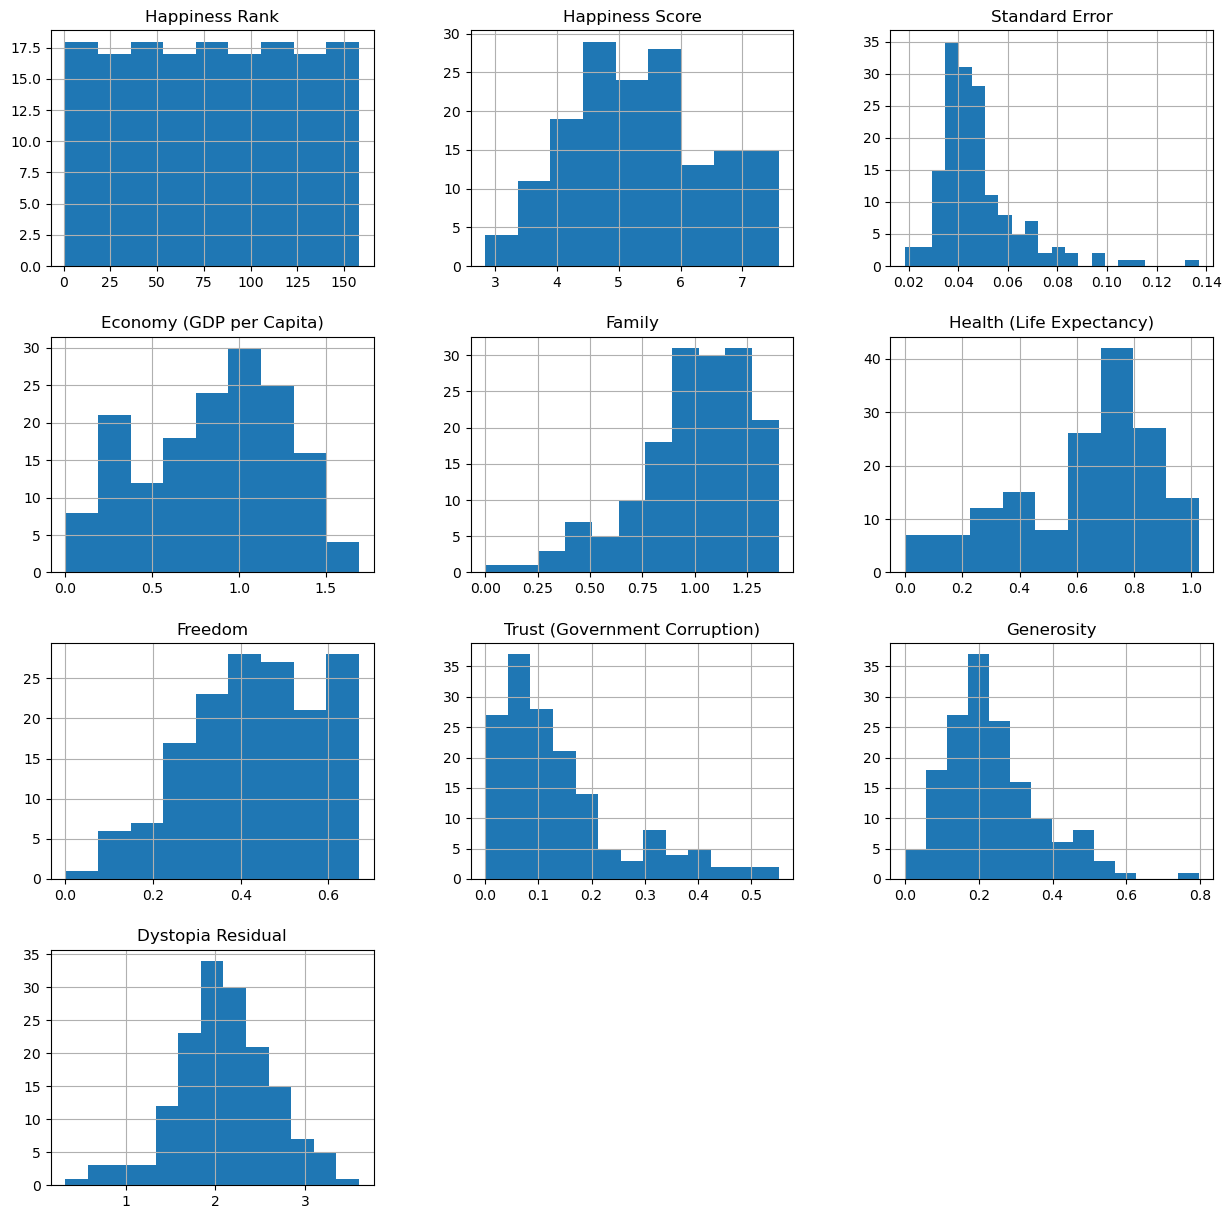

In [12]:
#Data Visulization
df.hist(bins="auto",figsize=(15,15))

In [14]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Happiness Rank                      AxesSubplot(0.125,0.712609;0.168478x0.167391)
Happiness Score                  AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Standard Error                   AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Economy (GDP per Capita)         AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Family                              AxesSubplot(0.125,0.511739;0.168478x0.167391)
Health (Life Expectancy)         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Freedom                          AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Trust (Government Corruption)    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
Generosity                           AxesSubplot(0.125,0.31087;0.168478x0.167391)
Dystopia Residual                 AxesSubplot(0.327174,0.31087;0.168478x0.167391)
dtype: object

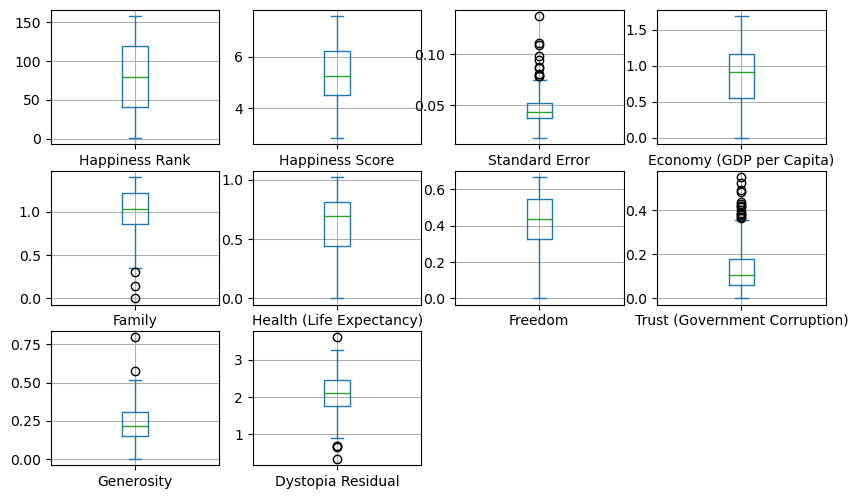

In [16]:
#Checking outliers
df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

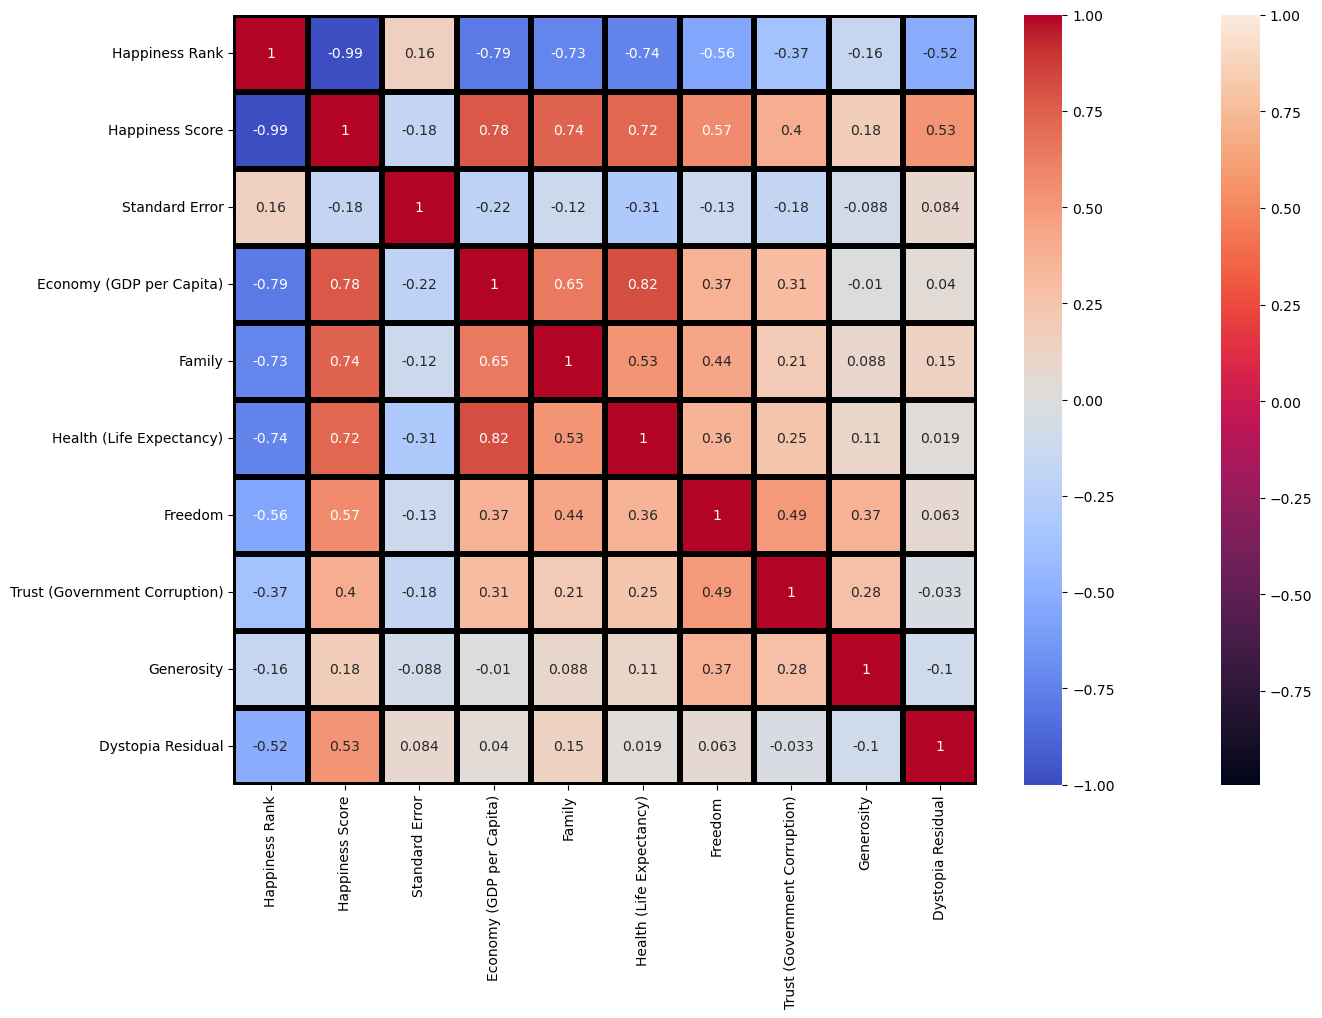

In [17]:
plt.figure(figsize=(15,10))   
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

plt.show()

In [ ]:
#Happiness score is 
#high relation with GDP per Capital, Family and health(Life Expectancy),
#low relation with Generosity and Government Corruption
#Negative relation with Happiness rank and standard error

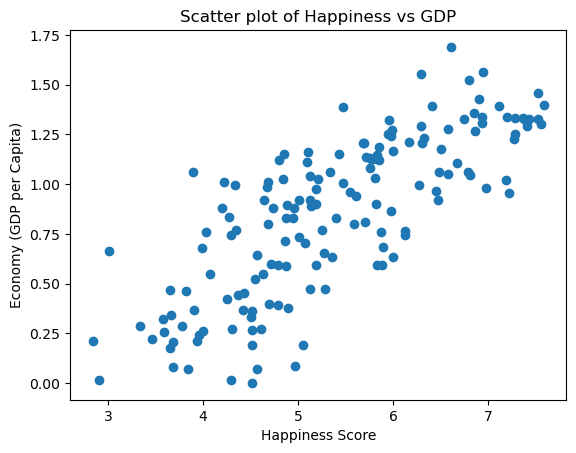

In [19]:
happiness_score=df['Happiness Score']
gdp=df['Economy (GDP per Capita)']

plt.scatter(happiness_score,gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

In [ ]:
#Higher GDP Higher happiness score

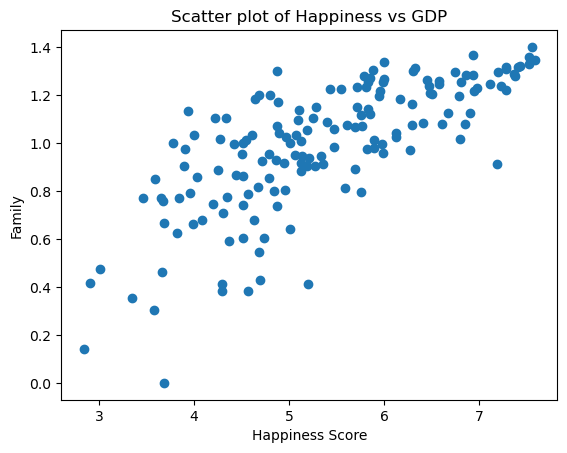

In [20]:
family=df['Family']

plt.scatter(happiness_score,family)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.show()

In [ ]:
#Higher with Family higher happiness score

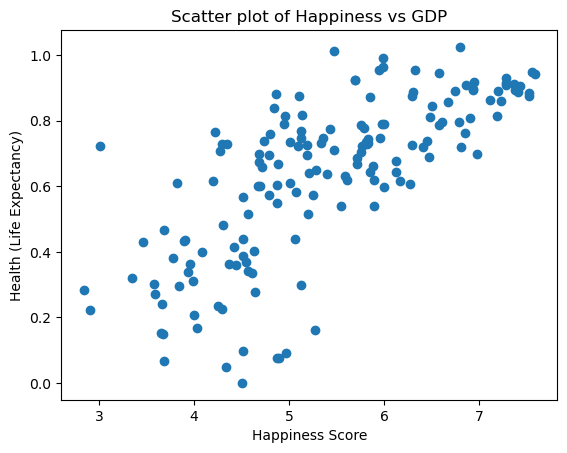

In [21]:
le=df['Health (Life Expectancy)']

plt.scatter(happiness_score,le)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.show()

In [ ]:
#Model

In [22]:
#dropping of categorial data(Country', 'Region') and Happiness Rank as it is irrelevant
dfnew=df.drop(['Country','Region','Happiness Rank'], axis=1)
dfnew.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
# Spliting of data into training(80%) and testing(20%) sets

from sklearn.model_selection import train_test_split


In [25]:
#taking high correlation value
# X = features, y = target variable

X = dfnew[['Economy (GDP per Capita)','Standard Error','Family','Health (Life Expectancy)','Freedom','Dystopia Residual']]
y = dfnew['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
dfnew=scale.fit_transform(dfnew)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)  

LinearRegression()

In [28]:
y_pred=lm.predict(X_test)
actual_vs_pred=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred

,Actual,Predicted
7,7.364,7.102382
44,5.995,6.089890
113,4.633,4.721436
120,4.514,4.514163
63,5.716,6.015593
122,4.507,4.516562
121,4.512,4.500815
139,3.956,3.840147
109,4.686,4.561262
92,5.007,5.070774


In [30]:
coefficient = lm.coef_
coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,Economy (GDP per Capita),0.961499
1,Standard Error,-0.594621
2,Family,1.008561
3,Health (Life Expectancy),1.058444
4,Freedom,1.707399
5,Dystopia Residual,0.935251


In [ ]:
#Most important factor is freedom as compared to all other factors

In [ ]:
#using Root Mean squared error for model evaluation

In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.1609729663946279


In [ ]:
# model fits the data well as lower RMSE